# 3.1 Nullstellen einer Funktion
## 3.1.1 Einführung (Skript)
## 3.1.2 Das Newton-Raphson Verfahren

In diesem Kapitel wird erklärt, wie man mit Python unter Verwendung des Newton-Raphson Verfahrens Nullstellen von beliebigen Funktionen finden kann. Unten finden Sie ein vollständiges Programm um die Nullstellen der Funktion 

$$f(x) = {x^2} - 3x + 2 - {e^x}$$

zu berechnen. Am Ende des Programms wird ein Plot erstellt, der die Funktion f(x) und deren Nullstellen zeigt.

Im Anschluss werden die Teile des Programms ausführlich erläutert. Wenn Sie bisher wenig Erfahrung mit Python haben, sollten Sie diese Teile durcharbeiten. Sie können jederzeit Änderungen im code vornehmen und die Auswirkungen betrachten.






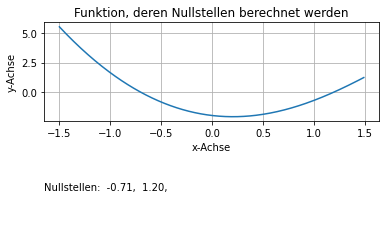

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 25 08:59:15 2021

@author: Steffen Rasenat
"""

#Nullstellensuche mit dem Newton-Raphson Verfahren
import sys

try:
    import matplotlib.pyplot as plt  
    import numpy as np
except:
    print("Benötigte module können nicht geladen werden - Abruch des Programms",file=sys.stderr)
    sys.exit(1)

#Funktion definieren, deren Nullstelle gesucht wird
def f_nullstellen(x):
    y=3*x**2-1-np.exp(x)
    return y

#Implementierung des Newton-Raphson-Verfahrens
def NewtonRaphsonMethode(f,xstart):
    h=0.001
    x=xstart
    #Maximal 100 Iterationen erlauben
    for i in range(99):
        #Ableitung berechnen
        f_strich=(f(x+h)-f(x))/h
        xneu=x-f(x)/f_strich
        if abs(xneu-x)<0.000001:
            #print(xneu)
            return xneu
        x=xneu  

#Hauptprogramm
xmin=-1.5
xmax=1.5
dx=0.01
x=np.arange(xmin,xmax,dx)
y=f_nullstellen(x)

nmax=int((xmax-xmin)/dx)  #Anzahl der notwendigen Iterationen berechnen
ii=0
xzero=[]  #leere Liste erzeugen
for i in range(nmax-1):
    #Berechnung der Startwerte und Nullstellen:
    if y[i]*y[i+1]<=0:  #Vorzeichenwechsel erkennen
        xstart=(x[i]+x[i+1])/2 #Startwert berechnen
        xzero.append(NewtonRaphsonMethode(f_nullstellen,xstart))
        ii=ii+1

#zwei Plot-Fenster übereinander erzeugen
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.plot(x,y)
ax1.set_xlabel('x-Achse')
ax1.set_ylabel('y-Achse')
ax1.set_title('Funktion, deren Nullstellen berechnet werden')
ax1.grid(True)
txt='Nullstellen:  '
for i in range(ii):
    txt=txt+'{:4.2f},  '.format(xzero[i])  #formatierten String erzeugen
    
ax2.set_axis_off()
ax2.text(0.0,0.5,txt)
fig.savefig('Nullstellensuche.pdf')







**Erläuterungen zu den einzelnen Programmteilen:**

Zu Beginn werden die notwendigen module, hier *numpy* und *matplotlib.pyplot* importiert. Mit *Numpy* werden aufwändige numerische Berechnungen in Python möglich und *matplotlib.pyplot*  benötigt man zum Erstellen von Plots. Die Syntax ist dabei ähnlich zu MATLAB. Das modul *sys* ermöglicht den Abbruch des Programms, falls die module nicht importiert werden können. Die in den modulen hinterlegten Funktionen werden mit modulename.funktion aufgerufen, z.B. sys.exit(1):

In [2]:
#Nullstellensuche mit dem Newton-Raphson Verfahren
import sys

try:
    import matplotlib.pyplot as plt  
    import numpy as np
except:
    print("Benötigte module können nicht geladen werden - Abruch des Programms",file=sys.stderr)
    sys.exit(1)

Dann wird die Funktion, deren Nullstellen bestimmt werden sollen, definiert. In Python wird eine Funktion mit dem Schlüsselwort *def* deklariert. Die Funktion *f_nullstellen* wird mit dem Argument x aufgerufen und gibt den Funktionswert y=f(x) zurück (*return*). Die zur Funktion gehörenden Zeilen werden eingerückt:

In [3]:
#Funktion definieren, deren Nullstelle gesucht wird
def f_nullstellen(x):
    y=3*x**2-1-np.exp(x)
    return y

Das Newton-Raphson Verfahren wird ebenfalls in eine Funktion ausgelagert. Dadurch ist es wiederverwendbar.

Dieser Funktion wird der Name der Funktion, deren Nullstellen berechnet werden sollen und der Startwert übergeben. 

Die *for*-Schleife durchläuft die Werte 0 bis 99, wodurch maximal 100 Iterationen erlaubt werden.

Die Ableitung wird durch den Differenzenquotienten berechnet *f_strich=(f(x+h)-f(x))/h*. 

Die *if*-Abfrage prüft, ob sich durch die neue Iteration ein *xneu* ergibt, dass sich sehr nahe an dem vorherigen *x*-Wert befindet. Falls dies der Fall ist, wird *xneu* als Nullstelle zurück gegeben und die *for*-Schleife dadurch beendet:




In [4]:
#Implementierung des Newton-Raphson-Verfahrens
def NewtonRaphsonMethode(f,xstart):
    h=0.001
    x=xstart
    #Maximal 100 Iterationen erlauben
    for i in range(99):
        #Ableitung berechnen
        f_strich=(f(x+h)-f(x))/h
        xneu=x-f(x)/f_strich
        if abs(xneu-x)<0.000001:
            #print(xneu)
            return xneu
        x=xneu  

Im "Hauptprogramm" werden die Nullstellen berechnet. Im ersten Teil wird ein numpy array durch *np.arange(xmin,xmax,dx)* 
erzeugt. Das array umfasst die Werte [-1.50, -1.51, -1.52, ..., 1.48, 1.49, 1.50], was durch den Befehl *print(x)* gezeigt werden könnte. Der Befehl*y=f_nullstellen(x)* ruft die entsprechende Funktion auf, in der für jedes Element von x der Funktionswert y berechnet wird. Durch den Befehl *type(y)* könnte gezeigt werden, dass y ebenfalls ein numpy array ist:

In [5]:
#Hauptprogramm
xmin=-1.5
xmax=1.5
dx=0.01
x=np.arange(xmin,xmax,dx)
y=f_nullstellen(x)

Nun werden die Nullstellen mit Hilfe der vorher definierten Funktion *NewtonRaphsonMethode* berechnet. Duch *xzero=[]* wird
eine leere Liste erzeugt, in der später die Nullstellen geschrieben werden. Die for-Schleife durchläuft die Werte von 0 bis nmax-1. Wird ein Vorzeichenwechsel durch *y[i]*y[i+1]<=0* erkannt, befindet sich zwischen *x[i] und x[i+1]* eine Nullstelle, die dann durch den Aufruf der Funktion *NewtonRaphsonMethode* berechnet wird. Durch den Befehl *xzero.append* werden die Nullstellen in *x[0], x[1], x[2], ...*:

In [6]:
nmax=int((xmax-xmin)/dx)  #Anzahl der notwendigen Iterationen berechnen
ii=0
xzero=[]  #leere Liste erzeugen
for i in range(nmax-1):
    #Berechnung der Startwerte und Nullstellen:
    if y[i]*y[i+1]<=0:  #Vorzeichenwechsel erkennen
        xstart=(x[i]+x[i+1])/2 #Startwert berechnen
        xzero.append(NewtonRaphsonMethode(f_nullstellen,xstart))
        ii=ii+1

Im letzten Programmteil wird die Funktion geplottet und die Nullstellen ausgegeben. Der Befehl *fig,(ax1,ax2)=plt.subplots(2,1)* erzeugt zwei übereinanderliegende Plot-Fenster. In das obere Fenster wird die Funktion geplottet und ins untere Fenster werden die Nullstellen geschrieben. Durch *fig.savefig('Nullstellensuche.pdf')* wird das Ergebnis als pdf-File abgespeichert:

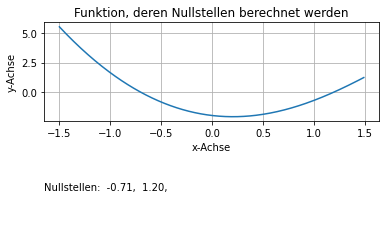

In [7]:
#zwei Plot-Fenster übereinander erzeugen
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.plot(x,y)
ax1.set_xlabel('x-Achse')
ax1.set_ylabel('y-Achse')
ax1.set_title('Funktion, deren Nullstellen berechnet werden')
ax1.grid(True)
txt='Nullstellen:  '
for i in range(ii):
    txt=txt+'{:4.2f},  '.format(xzero[i])  #formatierten String erzeugen
    
ax2.set_axis_off()
ax2.text(0.0,0.5,txt)
fig.savefig('Nullstellensuche.pdf')

Im nachfolgenden Fenster können Sie die Befehle *print(x), print(type(x)), print(type(y), print(range(99))* etc. testen:

In [8]:
print(range(99))

range(0, 99)


# 
## Ergänzung: Nullstellen von Polynomen mit *numpy* bestimmen

Für Polynome biete das modul *numpy* Funktionen an, die eine sehr einfach Behandlung dieser Funktionsklasse ermöglichen. Die Erstellung eines Polyomes erfolgt mit dem Befehl *np.poly1d*. Die unabhängige Variable ist standardmäßig *x* und könnte mit dem Befehl *variable='neuerName'* umbenannt werden. Der Aufruf *y.order* gibt den Grad des Polynoms zurück.

y=
    3     2
2 x + 3 x + 4 x + 5
Funktionswert: y(3.4)=131.89


Text(0.5, 1.0, 'Polynom vom Grad 3')

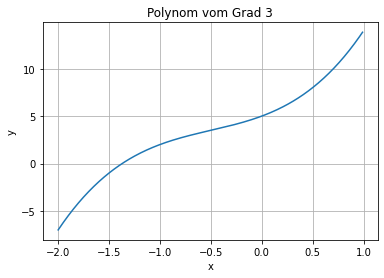

In [9]:
import sys
try:
    import matplotlib.pyplot as plt  
    import numpy as np
except:
    print("Benötigte module können nicht geladen werden - Abruch des Programms",file=sys.stderr)
    sys.exit(1)
    
y=np.poly1d([2,3,4,5])  #erzeugt ein Polynom 3. Grades 
                        #mit den Koeffizienten 2,3,4,5
print('y=\n',y)
x=3.4
print('Funktionswert: y({:.1f})={:.2f}'.format(x,y(x)))
x=np.arange(-2,1,0.01)
plt.plot(x,y(x))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Polynom vom Grad {:d}'.format(y.order))

Mit weiteren Funktionen aus numpy können die Koeffizienten und die Nullstellen bestimmt werden:

In [ ]:
grad=y.order
print('Grad des Polynoms: ',grad)
Koeffizienten=y.coef
print('Koeffizienten:',Koeffizienten)
Nullstellen=np.roots(y)
txt='Nullstellen: '
for i in range(grad):
    txt=txt+'{:4.3f},    '.format(Nullstellen[i])  #formatierten String erzeugen
print(txt)


Es können auch komplexe Nullstellen berechnet werden. Im untenstehenden Programm werden die Koeffizienten von der Konsole eingelesen, das Polynom geplottet und die Nullstellen berechnet. Die Koeffizienten müssen bei der Eingabe mit Kommas getrennt werden:

In [ ]:
import sys
try:
    import matplotlib.pyplot as plt  
    import numpy as np
except:
    print("Benötigte module können nicht geladen werden - Abruch des Programms",file=sys.stderr)
    sys.exit(1)
    

a=list(map(float,input('Koeffizienten eingeben (a_n, a_n-1, ...,a_1,a_0): ').split(',')))
#Die Python Funktion 'map' führt für jeden Koeffizienten, der als einzelner, String vorliegt (wg. .split), eine
#Konvertierung in float durch. Mit Hilfe von 'map' können Schleifen eingespart werden
y=np.poly1d(a)
print('Polynom {:d}. Ordnung: \n'.format(y.order))
print(y)

Nullstellen=np.roots(y)

#Die folgenden Codezeilen dienen lediglich zum Erzeugen eines Plots, bei dem die reellen Nullstellen sichtbar sind,
#d.h. zum Festlegen eines geeigneten Bereichs für die x-Koordinate
ii=0
reelle_Nullstellen=[]
for i in range(y.order):
    if abs(Nullstellen[i].imag)<=0.0000000001:
        reelle_Nullstellen.append(Nullstellen[i].real)
        ii=ii+1
if ii==0: 
    xmin=-4
    xmax=4
    plt.axis([xmin,xmax,-100,100])
if ii==1:
    xmin=reelle_Nullstellen[0]-1
    xmax=reelle_Nullstellen[0]+1
if ii>1:
    xmin=min(reelle_Nullstellen)
    xmax=max(reelle_Nullstellen)

dx2=(xmax-xmin)/8   
x=np.arange(xmin-dx2,xmax+dx2,0.01)    
plt.plot(x,y(x))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Polynom vom Grad {:d}'.format(y.order))
txt='Nullstellen: '
for i in range(y.order):
    txt=txt+'{:4.3f},    '.format(Nullstellen[i])  #formatierten String erzeugen
print('\n',txt)